# Binary Classification Project Outline

- [1- Importing Libraries & Data Exploration](#1-importing-libraries-and-data-exploration)
- [2- Data Visualization](#2-data-visualization)
- [3- Data Preparation for Preprocessing](#3-data-preparation-for-preprocessing)
- [4- Custom Transformets](#4-Custom-Transformets)
- [5- Data Pipeline](#4-pipelines)
- [6- Feature Importance](#5-feature-importance)
- [7- Machine Learning Modeling](#6-machine-learning-modeling)
    - [7.1- Comparing Model Performance](#61-comparing-model-performance)
- [8- Final Model](#7-final-model)
    - [8.1- Confusion Matrix and ROC Curve](#71-confusion-matrix-and-roc-curve)
    - [8.2- Cross-validation](#72-cross-validation)
- [9- Hyperparameter Tuning](#8-hyperparameter-tuning)



<a name="1"></a>
## Importing Libraries & Data Exploration

<h3>Importing libraries and dataframes</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

<h3>Data Exploration<h3>

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
print(df_train.shape)
print(df_test.shape)

(165034, 14)
(110023, 13)


In [5]:
print(df_train.columns)
print(df_test.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [6]:
df_train.drop(columns=['id','CustomerId'],inplace=True)
df_test.drop(columns=['id','CustomerId'],inplace=True)

<h4>Data summary</h4>

In [7]:
df_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname          165034 non-null  object 
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  object 
 3   Gender           165034 non-null  object 
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 15.1+ MB


In [9]:
df_train.duplicated().sum()

54

In [ ]:
df_train.drop_duplicates(inplace=True)
df_train.drop_duplicates(inplace=True)

In [10]:
df_train.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df_test.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
df_train['Surname'].value_counts()

Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64

In [13]:
# import category_encoders as ce

# # Initialize the Target Encoder
# encoder = ce.TargetEncoder(cols=['Surname'])

# # Fit the encoder on the training data (using the target 'Exited')
# df_train['Surname'] = encoder.fit_transform(df_train['Surname'], df_train['Exited'])


In [14]:
# #This column contains the surname of every customer of our dataset so we better off dropping the column 
# #Beacuse it will be too hard to encode and we will not gain much insght from this column
# df_train.drop(columns='Surname',inplace=True)
# df_test.drop(columns='Surname',inplace=True)

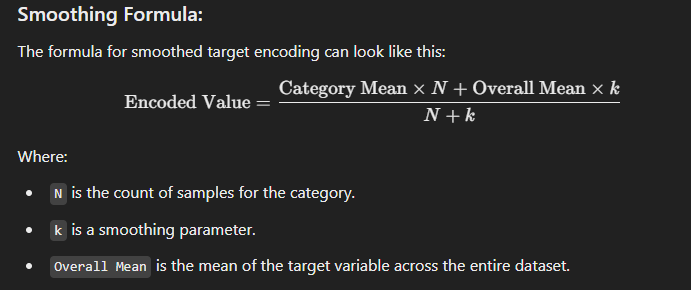

<a name="2"></a>
## Data Visualization

In [15]:
#Intialize numerical and categorical columns
num_col=['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
cat_col=['Geography','Gender','NumOfProducts','HasCrCard','Tenure','IsActiveMember']            

<h3>Target column "Exited" Visualization</h3>

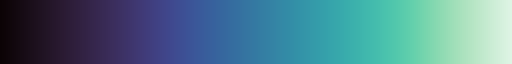

In [16]:
sns.color_palette("mako", as_cmap=True)

<function matplotlib.pyplot.show(close=None, block=None)>

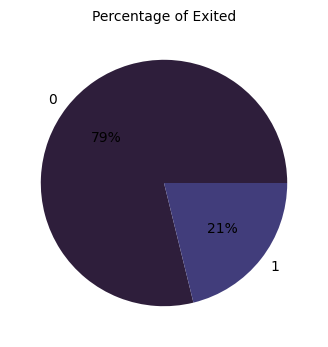

In [17]:
sns.set_palette('mako')
plt.figure(figsize=(6,4))
df_train['Exited'].value_counts().plot(kind='pie',autopct='%0.0f%%')
plt.title('Percentage of Exited',fontsize=10)
plt.ylabel('')
plt.show

In [18]:
#From the looks of it we have a serious case of Unbalanced Data requires further analysis

<h3>Plot the numerical columns</h3>

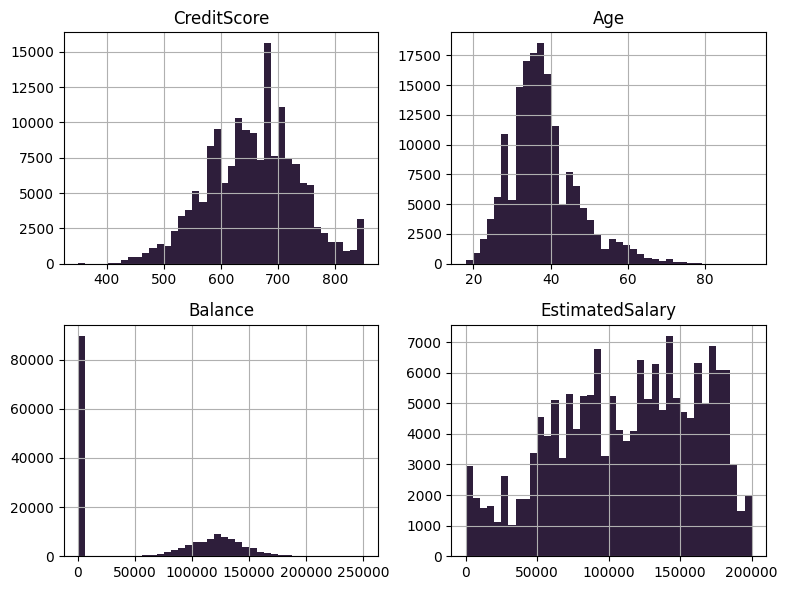

In [19]:
df_train[num_col].hist(bins=40,figsize=(8,6))
plt.tight_layout()
plt.show()

<h3>Plot Continous Value Columns</h3>

In [20]:
#We need to segregate the Continous Value Columns from the Discrete Value columns for ease of Data Visulization and Display
cont_col=df_train[['CreditScore','Age','Balance','EstimatedSalary']]

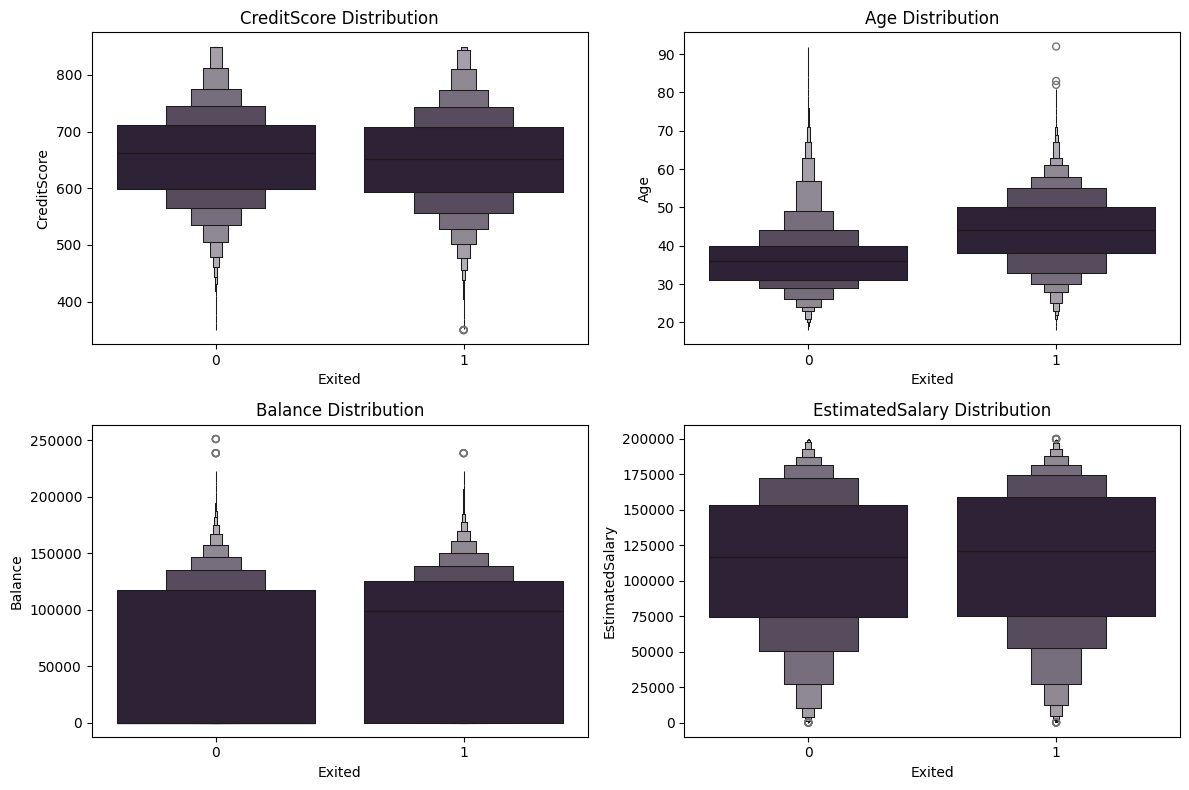

In [21]:
fig,axes=plt.subplots(nrows=len(cont_col.columns)//2 ,ncols=2,figsize=(12,8))
for idx,column in enumerate(cont_col):
    row_idx=idx//2
    col_idx=idx%2
    sns.boxenplot(x='Exited',y=column,data=df_train,ax=axes[row_idx,col_idx])
    axes[row_idx,col_idx].set_xlabel('Exited')
    axes[row_idx,col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()    

In [22]:
#From the Graph it is clear that these numerical columns' distribution is  fairly similar however the most of the people who leaves the bank are older (churned) 

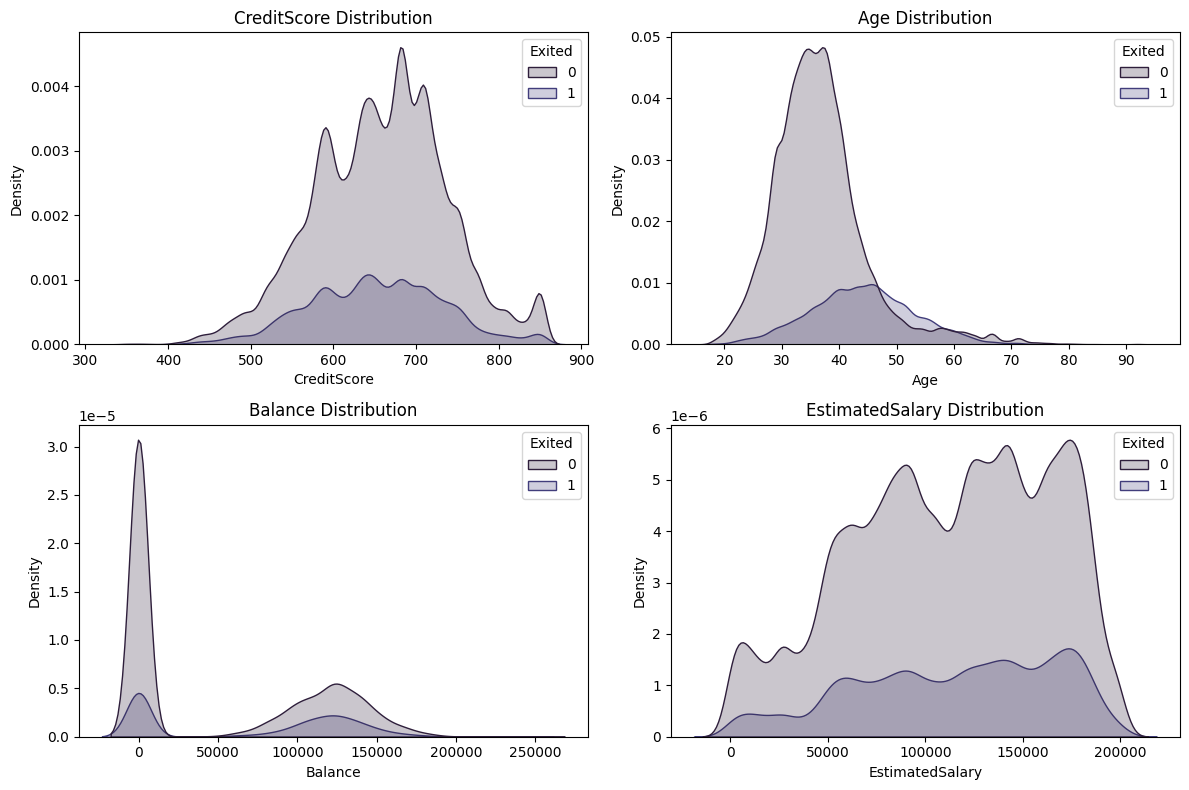

In [23]:
fig,axes=plt.subplots(nrows=len(cont_col.columns)//2 ,ncols=2,figsize=(12,8))
for idx,column in enumerate(cont_col):
    row_idx=idx//2
    col_idx=idx%2
    sns.kdeplot(x=column,hue='Exited',data=df_train,ax=axes[row_idx,col_idx],fill=True)
    axes[row_idx,col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()  

<h3>Categorical Columns EDA</h3>

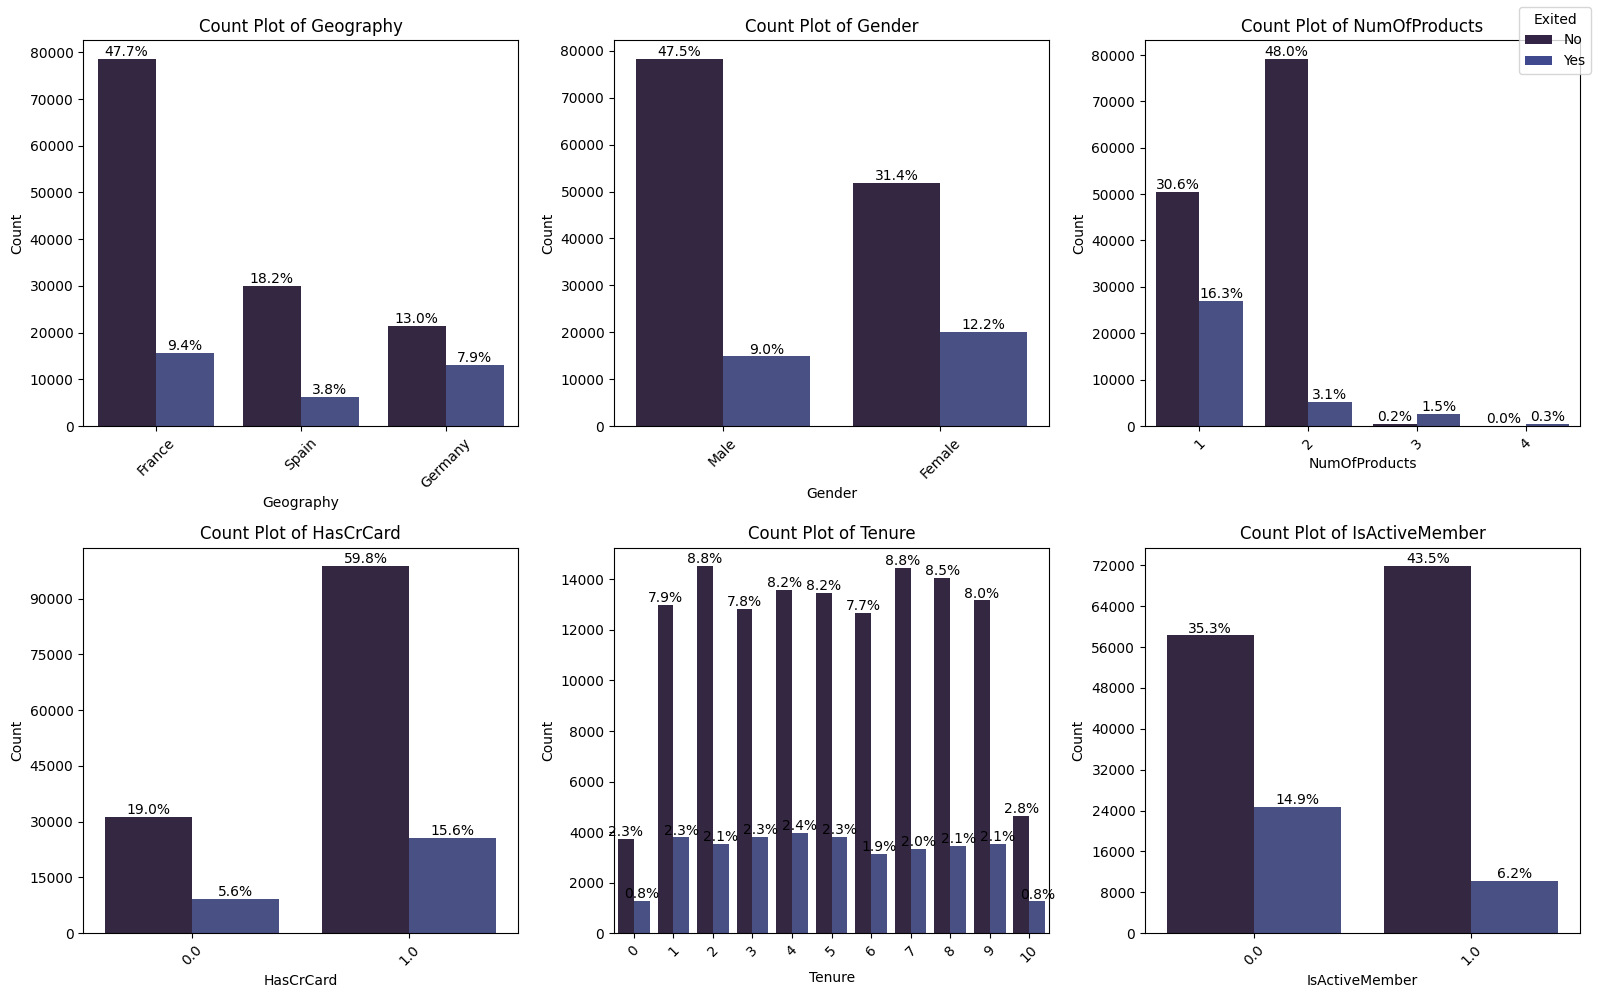

In [24]:
palette = sns.color_palette('mako', 5)
num_plots = len(cat_col)
num_cols = 3  # Number of columns in the plot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5*num_rows))
axes = axes.flatten()  # Flatten the axes array if it's multidimensional

# Create a custom legend
custom_legend = [plt.Rectangle((0,0),1,1,fc=palette[0], edgecolor='none'),
                 plt.Rectangle((0,0),1,1,fc=palette[1], edgecolor='none')]

for i, column in enumerate(cat_col):
    ax = axes[i]
    sns.countplot(x=column, data=df_train, ax=ax, palette=palette, hue='Exited', legend=False)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    # Calculate and display the percentage of each bar
    total = len(df_train[column])
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.text(p.get_x() + p.get_width()/2., p.get_height(),
                f'{percentage:.1f}%',
                ha="center", va="bottom")

    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.set_ylim(bottom=ax.get_ylim()[0])  # Set the bottom limit to the current minimum

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add a single legend to the figure
fig.legend(custom_legend, ['No', 'Yes'], title='Exited', loc='upper right')

plt.tight_layout()
plt.show()



<h3>Ploting Colinearity </h3>

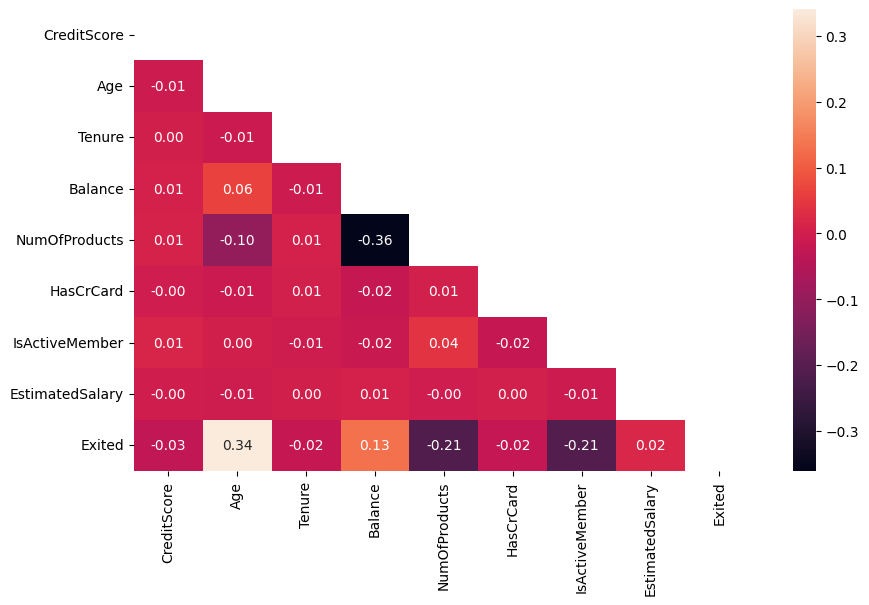

In [27]:
corr = df_train.corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True,mask=mask,  fmt='.2f')
plt.show()

<a name="3"></a>
## Data Prepration for Preprocessing

<h3>Outliers Precentage</h3>

In [28]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

    
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")    

In [29]:
for col in (cont_col.columns):
    outlier_percentage(df_train,col)

CreditScore
Outliers percentage: 0.15330174388307863 %
-------------------------
Age
Outliers percentage: 3.8743531635905324 %
-------------------------
Balance
Outliers percentage: 0.0 %
-------------------------
EstimatedSalary
Outliers percentage: 0.0 %
-------------------------


In [30]:
#Outliers are innocent till proven guilty and and the percentages are not that high could be handled in other ways forward

In [31]:
#The outliers percentage is not that high so we could leave them or drop them or impute with the IQR
#I prefer Imputing with the IQR 
# def replace_with_threshholds(dataframe,dataframe2,column):
#     low_limit,up_limit=outlier_threshhold(dataframe,column)
#     dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
#     dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
#     dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
#     dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit  
# for column in (cont_col.columns):
#     replace_with_threshholds(df_train,df_test,column)    

<h3>ML Packages</h3>

In [32]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,mean_squared_error,roc_auc_score,precision_score,recall_score,roc_curve,ConfusionMatrixDisplay,confusion_matrix,auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,RobustScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator,TransformerMixin
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer,KNNImputer
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce

<a name="4"></a>
### Custom Transformers

In [33]:
class StandardScaleTransform(BaseEstimator, TransformerMixin):
    """
    A transformer class to apply standard scaling to specified columns in a Pandas DataFrame.

    Parameters
    ----------
    cols : list of str
        The names of the columns to apply standard scaling to.
    """
    def __init__(self, cols):
        self.cols = cols
        self.scaler_ = None

    def fit(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        return self.transform(X)

In [34]:
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):

    """
    A transformer class to apply one-hot encoding to specified columns in a Pandas DataFrame.

    Parameters
    ----------
    columns : list
        A list of column names to encode.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with the specified columns one-hot encoded.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.feature_names_ = None

    def fit(self, X, y=None):
        self.feature_names_ = pd.get_dummies(X[self.columns], prefix=self.columns).columns.tolist()
        return self

    def transform(self, X):
        X_transformed = pd.get_dummies(X[self.columns], prefix=self.columns)
        
        # Drop original columns if necessary
        if self.columns is not None:
            X = X.drop(self.columns, axis=1)
        
        # Concatenate transformed columns with remaining DataFrame
        X = pd.concat([X, X_transformed], axis=1)
        return X
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [35]:
class OrdinalEncodeColumns(BaseEstimator, TransformerMixin):
    """
    Transformer class to perform ordinal encoding on specified columns of a Pandas DataFrame.

    Parameters
    ----------
    columns : list of str
        The names of the ordinal columns to encode.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with the ordinal columns encoded.
    """
    def __init__(self, columns):
        self.columns = columns
        self.encoder = None
    
    def fit(self, X, y=None):
        ordinal_data = X[self.columns].values
        self.encoder = OrdinalEncoder()
        self.encoder.fit(ordinal_data)
        return self
    
    def transform(self, X):
        X_new = X.copy()
        ordinal_data = X_new[self.columns].values
        encoded_data = self.encoder.transform(ordinal_data)
        X_new[self.columns] = encoded_data
        return X_new
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [36]:
class DataFrameImputer(TransformerMixin, BaseEstimator):
    """
    A class to impute missing values in a Pandas DataFrame using a combination of median, knn, and most frequent
    imputers on specified columns.

    Parameters:
    -----------
    median_cols : list of str, optional (default=None)
        Columns to impute missing values using the median imputer.
    knn_cols : list of str, optional (default=None)
        Columns to impute missing values using the KNN imputer.
    freq_cols : list of str, optional (default=None)
        Columns to impute missing values using the most frequent imputer.
    const_cols : dict of {column_name: constant_value} pairs, optional (default=None)
        Columns to impute missing values using a constant value.

    Returns:
    --------
    X_imputed : pandas.DataFrame
        A DataFrame with imputed missing values.
    """
    def __init__(self, median_cols=None, knn_cols=None, freq_cols=None, const_cols=None, fill_const=0):
        self.median_cols = median_cols
        self.knn_cols = knn_cols
        self.freq_cols = freq_cols
        self.const_cols = const_cols
        self.fill_const = fill_const
    
    def fit(self, X, y=None):
        self.median_imputer = SimpleImputer(strategy='median')
        self.knn_imputer = KNNImputer()
        self.freq_imputer = SimpleImputer(strategy='most_frequent')
        self.const_imputer = SimpleImputer(strategy='constant', fill_value=self.fill_const)

        if self.median_cols is not None:
            self.median_imputer.fit(X[self.median_cols])
        if self.knn_cols is not None:
            self.knn_imputer.fit(X[self.knn_cols])
        if self.freq_cols is not None:
            self.freq_imputer.fit(X[self.freq_cols])
        if self.const_cols is not None:
            self.const_imputer.fit(X[self.const_cols])

        return self
    
    def transform(self, X):
        X_imputed = X.copy()
        if self.median_cols is not None:
            X_median = pd.DataFrame(self.median_imputer.transform(X[self.median_cols]), 
                                    columns=self.median_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.median_cols, axis=1), X_median], axis=1)
        if self.knn_cols is not None:
            X_knn = pd.DataFrame(self.knn_imputer.transform(X[self.knn_cols]), 
                                 columns=self.knn_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.knn_cols, axis=1), X_knn], axis=1)
        if self.freq_cols is not None:
            X_freq = pd.DataFrame(self.freq_imputer.transform(X[self.freq_cols]), 
                                  columns=self.freq_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.freq_cols, axis=1), X_freq], axis=1)
        if self.const_cols is not None:
            X_const = pd.DataFrame(self.const_imputer.transform(X[self.const_cols]), 
                                  columns=self.const_cols, index=X.index)
            X_imputed = pd.concat([X_imputed.drop(self.const_cols, axis=1), X_const], axis=1)
        return X_imputed
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [37]:

class TargetEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols  # List of categorical columns to encode
        self.encoder = None  # Placeholder for the category encoder

    def fit(self, X, y):
        """Fit the target encoder using the training data."""
        self.encoder = ce.TargetEncoder(cols=self.cols)
        self.encoder.fit(X[self.cols], y)
        return self  # Return the transformer object

    def transform(self, X):
        """Apply the target encoding to the data (test or new data)."""
        X_transformed = X.copy()
        X_transformed[self.cols] = self.encoder.transform(X[self.cols])
        return X_transformed

<a name="5"></a>
## Data  Pipeline

In [38]:
class FullPipeline1:
    def __init__(self):
        self.numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
        self.categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember']
        self.OD_cols = ['Gender', 'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember']
        self.OH_cols = ['Geography']
        self.TE_cols = ['Surname']
        self.full_pipeline = Pipeline([
            ('impute_num', DataFrameImputer(knn_cols=self.numerical_cols)),
            ('impute_cat', DataFrameImputer(freq_cols=self.categorical_cols)),
            ('scale', StandardScaleTransform(self.numerical_cols)),
            ('ordinal_encode', OrdinalEncodeColumns(self.OD_cols)),
            ("one_hot_encode", CustomOneHotEncoder(self.OH_cols)),
            ('target_encode', TargetEncoderTransformer(self.TE_cols))
        ])

    def fit_transform(self, X_train, y_train):
        X_train = self.full_pipeline.fit_transform(X_train, y_train)
        return X_train, y_train
    
    def transform(self, X_test):
        return self.full_pipeline.transform(X_test)

f1 = FullPipeline1()
X_train, y_train = df_train.drop('Exited', axis=1), df_train['Exited']
X_train_f1, y_train_f1 = f1.fit_transform(X_train, y_train)
# Combine X_train_f1 with y_train_f1
train_f1 = X_train_f1.copy()
train_f1['Exited'] = y_train_f1
# Reset the index of the combined dataframe
train_f1 = train_f1.reset_index(drop=True)
test_f1 = f1.transform(df_test)

In [39]:
X_train_f1

,Surname,CreditScore,Age,Balance,EstimatedSalary,Gender,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain
0,0.318008,0.144135,-0.578074,-0.883163,1.369486,1.0,1.0,1.0,3.0,0.0,True,False,False
1,0.326667,-0.367706,-0.578074,-0.883163,-1.254085,1.0,1.0,1.0,1.0,1.0,True,False,False
2,0.222052,0.268974,0.211354,-0.883163,1.437422,1.0,1.0,1.0,10.0,0.0,True,False,False
3,0.181991,-0.941966,-0.465299,1.486918,-0.557018,1.0,0.0,1.0,2.0,1.0,True,False,False
4,0.146341,0.743362,-0.578074,-0.883163,-1.938770,1.0,1.0,1.0,5.0,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.245774,0.131651,-0.578074,-0.883163,0.382957,0.0,0.0,1.0,2.0,1.0,False,False,True
165030,0.217252,1.692140,-0.352523,-0.883163,0.382951,1.0,0.0,0.0,3.0,0.0,True,False,False
165031,0.209283,-1.141708,-0.803625,-0.883163,0.295366,1.0,0.0,1.0,5.0,1.0,True,False,False
165032,0.229757,-1.279031,-0.916401,1.688303,-0.823217,0.0,0.0,0.0,7.0,1.0,False,False,True


### Resampling

In [40]:
# #Import Huprid Resampling model uses both smote (Synthetic Minority Over-sampling Technique) 
# # with Tomek links (a form of undersampling)
# from imblearn.combine import SMOTETomek

# # Initialize SMOTETomek
# smote_tomek = SMOTETomek(random_state=42)

# # Apply SMOTETomek to training data
# X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_f1, y_train_f1)
# #Concate Train Data
# # Concatenate X_train_resampled and y_train_resampled
# X_train_resampled['Exited'] = y_train_resampled
# train_resampled = X_train_resampled

# # Reset the index of the resampled dataframe
# train_resampled = train_resampled.reset_index(drop=True)

# # Print the new class distribution
# print("Class distribution after SMOTETomek:")
# print(y_train_resampled.value_counts())

## Feature Importance
<a name="6"></a>

In [41]:
#Create a train and validations sets
from sklearn.model_selection import train_test_split
train,valid=train_test_split(train_f1,test_size=0.2,random_state=42)
#Split the labels and the target
X_train,y_train,X_valid,y_valid=train.drop(columns='Exited'),train['Exited'],valid.drop(columns='Exited'),valid['Exited']
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(132027, 13)
(132027,)
(33007, 13)
(33007,)


In [42]:
X_train

,Surname,CreditScore,Age,Balance,EstimatedSalary,Gender,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain
149380,0.202941,0.281458,0.324129,-0.883163,-0.179228,1.0,1.0,1.0,9.0,1.0,True,False,False
164766,0.162619,0.805782,0.888007,0.959705,-0.191360,1.0,1.0,1.0,9.0,0.0,True,False,False
155569,0.350785,-1.316483,-0.352523,-0.883163,0.851410,1.0,0.0,1.0,5.0,0.0,True,False,False
124304,0.319148,1.080428,-0.803625,0.038014,-0.102329,0.0,1.0,1.0,3.0,1.0,False,False,True
108008,0.128210,0.231522,-1.141952,-0.883163,0.428215,1.0,1.0,1.0,2.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.181991,0.144135,0.775231,0.781609,0.010073,1.0,0.0,1.0,6.0,0.0,False,True,False
103694,0.181991,1.180299,0.549680,-0.883163,-0.471409,1.0,1.0,1.0,7.0,0.0,True,False,False
131932,0.147677,1.205267,0.098578,-0.883163,1.101528,0.0,1.0,1.0,7.0,0.0,True,False,False
146867,0.073760,0.356361,1.113557,-0.883163,-1.741327,0.0,1.0,1.0,4.0,1.0,True,False,False


In [43]:
#Create and train a Random Forest Classfier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
feature_importance_df


,Feature,Importance
2,Age,0.214784
0,Surname,0.138727
6,NumOfProducts,0.136164
4,EstimatedSalary,0.122690
1,CreditScore,0.117216
3,Balance,0.095005
8,Tenure,0.064705
9,IsActiveMember,0.045265
11,Geography_Germany,0.021978
5,Gender,0.018104


<h3>Plot Feature Importance</h3>

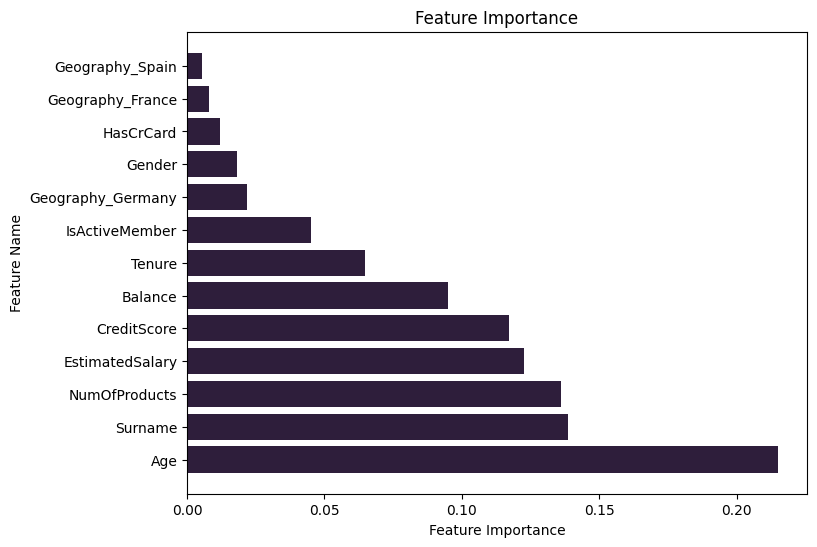

In [44]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

### Machine Learning Modeling
<a name="7"></a>

In [45]:
model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
models=[
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    LogisticRegression(random_state=42),
    XGBClassifier(random_state=42),
    CatBoostClassifier(random_state=42,verbose=False)
]

for model in models:
    model.fit(X_train , y_train)
    prediction = model.predict(X_valid)
    y_predict=model.predict_proba(X_valid)[:, 1]
    model_name.append(model.__class__.__name__)
    accuracy.append((accuracy_score( prediction , y_valid ) * 100 ) )
    roc_auc.append((roc_auc_score(y_valid , y_predict)*100) )
    F1_score.append((f1_score(y_valid , prediction)* 100) )

In [46]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
models_df.sort_values("AUC", ascending = False)

,Model-Name,Accuracy,AUC,F1-Score
7,CatBoostClassifier,87.030024,89.883171,65.135597
2,GradientBoostingClassifier,86.914897,89.766216,64.426324
6,XGBClassifier,86.987609,89.661380,65.504779
4,AdaBoostClassifier,86.705850,88.877745,63.699537
1,RandomForestClassifier,86.584664,88.803202,63.675144
3,ExtraTreesClassifier,86.239283,88.326611,62.450397
5,LogisticRegression,83.876147,83.196907,51.958837
0,DecisionTreeClassifier,79.849729,70.702893,53.440672


### Plot The Models' Performance metrics
<a name="7.1"></a>

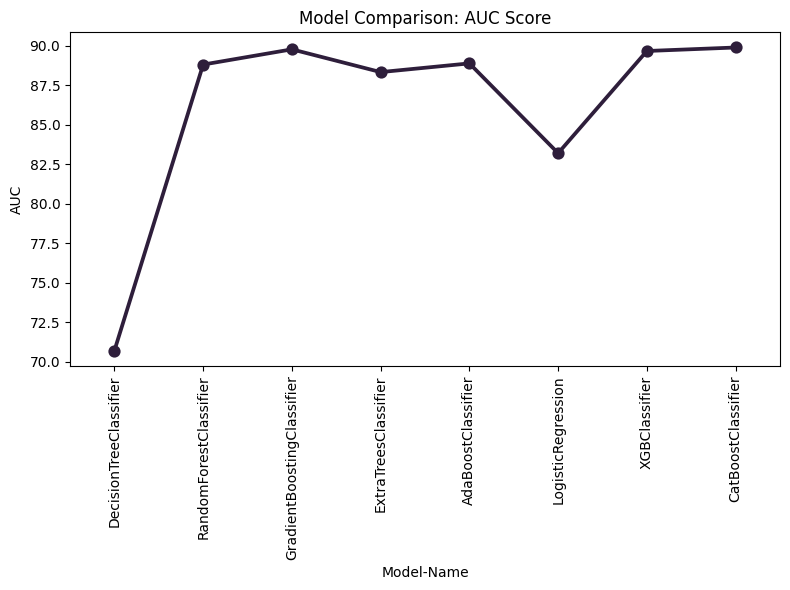

In [47]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='AUC',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: AUC Score')
plt.tight_layout()
plt.show()

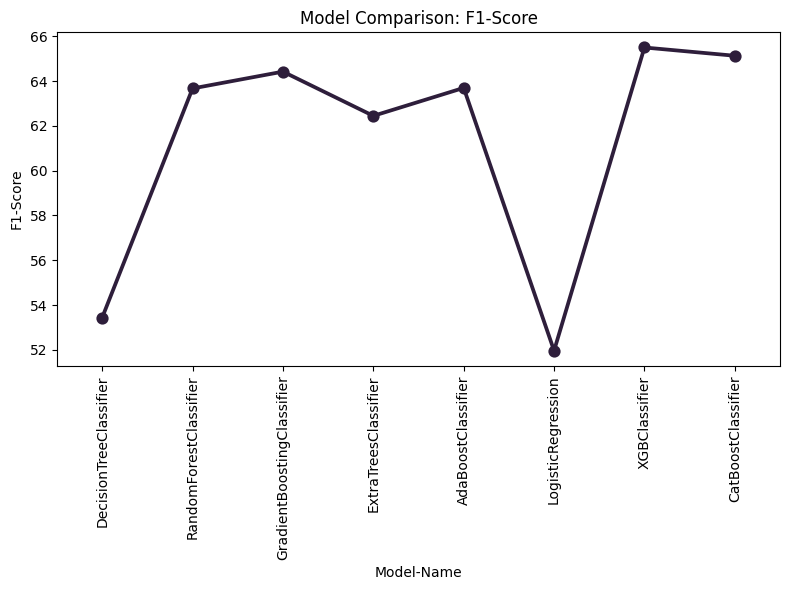

In [48]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='F1-Score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: F1-Score')
plt.tight_layout()
plt.show()

In [49]:
#Since we will use the Auc Score as our main performance metric we will use the CatBoostClassfier 


## Final Model
<a name="8"></a>

In [50]:
cbc=CatBoostClassifier(random_state=42)


In [51]:
cbc.fit(X_train,y_train,verbose=False)


In [52]:
y_pred_gbc = cbc.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_pred_gbc)
print("AUC score:", auc_score)

AUC score: 0.8988317094727207


### Plot Confusion Matrix
<a name="8.1"></a>

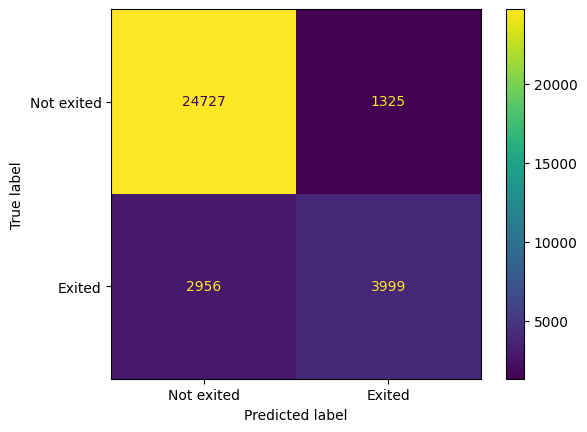

In [53]:
def plot_confusion_matrix(target_test,target_pred):
    conf=confusion_matrix(target_test,target_pred)
    plot=ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['Not exited', 'Exited'])
    plot.plot()
    plt.show()
y_pred=cbc.predict(X_valid)
plot_confusion_matrix(y_valid,y_pred)


<h3>Plot Roc Curve</h3>

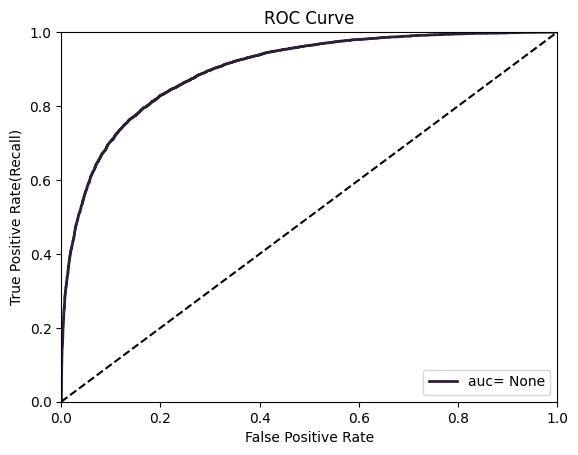

In [54]:
def plot_roc_curve(fpr, tpr, label = None):
    
    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")
    plt.title("ROC Curve")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()
fpr,tpr,thresholds=roc_curve(y_valid,y_pred_gbc)
plot_roc_curve(fpr,tpr)

### Cross Validation
<a name="8.2"></a>

In [ ]:
#Perform 10-fold cross-validation without verbose output
cv_scores = cross_val_score(cbc, train_f1.drop(columns='Exited'), train_f1['Exited'], cv=10, scoring='roc_auc', verbose=0)


In [60]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-validation scores: [0.89574673 0.90386961 0.89519296 0.89367162 0.89719477 0.89582868
 0.89747031 0.89830967 0.89550616 0.89556951]
Mean CV Score: 0.896836003213816
Standard Deviation of CV Scores: 0.002654448283715034


## HyperParameter Tuning
<a name="9"></a>

In [63]:
# Define the parameter grid for CatBoostClassifier
param_distributions = {
    'depth': [2,4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1,0.2,1],
    'iterations': [100, 200, 300,500],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

X,y=train_f1.drop(columns='Exited'),train_f1['Exited']

# Create the CatBoostClassifier model
cbc_tuning = CatBoostClassifier(random_state=42, verbose=False)

# Perform grid search with cross-validation
random_search = RandomizedSearchCV(estimator=cbc_tuning, param_distributions=param_distributions, 
                           cv=10, scoring='roc_auc', n_jobs=-1, verbose=0,random_state=42)

# Fit the grid search to the data
random_search.fit(X, y)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Update the cbc model with the best parameters
cbc = CatBoostClassifier(**best_params, random_state=42, verbose=False)


Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 7, 'iterations': 300, 'depth': 6}
Best ROC AUC Score: 0.897187184720997


<h2>Save Submission File</h2>

In [65]:
X,y=train_f1.drop(columns='Exited'),train_f1['Exited']
cbc.fit(X,y)
X_sub = test_f1
ss=pd.read_csv('sample_submission.csv')
id=ss['id']
y_sub=cbc.predict_proba(X_sub)
y_sub=y_sub[:,1]
id_data=pd.DataFrame(id)
id_data.columns.name='id'
ids=id_data.values
sub = np.concatenate((ids.reshape(-1,1), y_sub.reshape(-1,1)), axis=1)
df_sub = pd.DataFrame(sub, columns=['id', 'Exited'])
df_sub.head()

,id,Exited
0,165034.0,0.016005
1,165035.0,0.853110
2,165036.0,0.020287
3,165037.0,0.208159
4,165038.0,0.388602


### Save Model

In [69]:
#Save the model
import joblib
joblib.dump(cbc, 'cbc.pkl')
# #Load the model
# cbc = joblib.load('cbc.pkl')

['cbc.pkl']

In [67]:
df_sub.to_csv('submission.csv', index=False)